# Random Forest and Feature Importance on Dishonest User Dataset
**Author:** Kalea Sebesta<br>
**Date:** 19 Oct 2018<br>

**Dataset:** UC Irvine https://archive.ics.uci.edu/ml/datasets/Dishonest+Internet+users+Dataset#

**Purpose:** The purpose of this notebook is to apply random forest classifier algorithm on a dishonest internet user dataset and perform feature importance. The cavat to this problem is the data set is small.

In [130]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.metrics import recall_score
from sklearn.ensemble import RandomForestClassifier
import random
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
import matplotlib as plt
import seaborn as sns
%matplotlib inline

## Create Functions

rf_results is a function that takes in the x and y smote training set and the x and y test split sets calculates the predicted value for y test set and calculates the confusion matrix and displays the results. This function uses the random forest classifier to fit a model using the training x and y smote sets and then uses it to predict the labels for the x testing set; this results in accuiring the y_pred. From there, the confusion matrix calculations are made.

TN = True Negative: Predicted trustworthy when the true label was trustworthy<br>
FP = False Positive: Predicted untrustworthy when the true label was trustworthy<br>
FN = False Negative: Predicted trustworthy when the true label was untrustworthy<br>
TP = True Positive: Predicted untrustworthy when the true label was untrustworthy<br>

The Confusion Matrix is then displayed with the predicted values and actual value counts along with the testing accuracy score for the smote training to predict the y test value, sensitivity score using smote training to predict y test value, and the number of mislabled points.

In [128]:
#create function
def rf_results(x_train_res, y_train_res, X_test, y_test):
    y_pred = rnd_clf2.fit(x_train_res, y_train_res).predict(X_test)
    recall = recall_score(y_test, y_pred, average='macro')

    confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = confusion_matrix(y_test,y_pred).ravel()
    tn, fp, fn, tp

    #display confusion matrix
    print('                  Predicted Value')
    print(' Actual      |Trustworthy| Untrustworthy|')
    print('Trustworthy  |  {}          {}         '.format(tn, fp))
    print('Untrustworthy|  {}          {}        \n'.format(fn, tp))

    print('Test Accuracy Score using SMOTE Training to predict y_test split: {}'.format(accuracy_score(y_test, y_pred)))
    print('Test Sensitivity Score using SMOTE Training to predict y_test split: {}'.format(recall_score(y_test, y_pred, average = 'macro')))
    print('sensitivity: {}'.format(recall))

    print("Number of mislabeled points out of a total %d points : %d"%(x_train_res.shape[0],(y_test != y_pred).sum()))

## Read In Data

In [131]:
#read in data
df = pd.read_csv('Dishonest_Internet_User_Expanded.csv')
df.head()

,CT,CU,LT,TC,TS,User_Status,TA
0,CT_range_4,CU_range_1,LT_range_4,sport,untrustworthy,fair,BM
1,CT_range_4,CU_range_1,LT_range_4,sport,untrustworthy,fair,BM
2,CT_range_1,CU_range_4,LT_range_4,sport,trustworthy,fair,BM
3,CT_range_2,CU_range_1,LT_range_4,sport,trustworthy,fair,BM
4,CT_range_3,CU_range_1,LT_range_4,sport,trustworthy,fair,BM


## Data Preprocessing
The target variable needs to be identified in a binary numerical form. Untrustworthy is set to 1 and trustworthy is set to 0. The features are also encoded.

In [132]:
#preprocess data
# creating a dict file
target = df['TS']
TS = {'untrustworthy': 1,'trustworthy': 0} 

# traversing through dataframe 
# TS column and writing 
# values where key matches 
target = [TS[item] for item in target] 

trustworthy      3178
untrustworthy    1652
Name: TS, dtype: int64

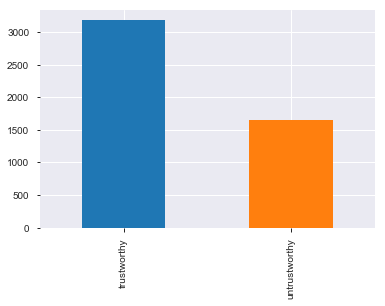

In [133]:
pd.value_counts(df['TS']).plot.bar()
df['TS'].value_counts()

In [134]:
#encode categorical variables
#label encodered used thus maps are made alphebetically
#range_1 maps to 0, range_2 maps to 1, range_3 maps to 2, range_4 maps to 3
#ECommerce maps to 0, game maps to 1, holiday maps to 2, sport maps to 3

In [135]:
features = df.drop(['TS'], axis = 1)

In [136]:
features = features.apply(preprocessing.LabelEncoder().fit_transform)

In [137]:
features.head()

,CT,CU,LT,TC,User_Status,TA
0,3,0,3,3,0,0
1,3,0,3,3,0,0
2,0,2,3,3,0,0
3,1,0,3,3,0,0
4,2,0,3,3,0,0


## Make Random Forest Model 
The first random forest modal made using all features results in a accuracy and sensitivity of 100% and the feature importance shows that user_status has the most influence followed by TC and CT. This model suggests that it is overfiting.

In [138]:
rnd_clf = RandomForestClassifier(n_estimators=500, n_jobs=-1, random_state=42)
rnd_clf.fit(features, target)
for name, importance in zip(features, rnd_clf.feature_importances_):
     print(name, "=", importance)

CT = 0.22485988020519457
CU = 0.046566742322254995
LT = 0.15796325221914323
TC = 0.24727104719600107
User_Status = 0.29282524638655877
TA = 0.03051383167084752


In [141]:
rf_results(x_train_res, y_train_res, X_test, y_test)

                  Predicted Value
 Actual      |Trustworthy| Untrustworthy|
Trustworthy  |  609          0         
Untrustworthy|  0          357        

Test Accuracy Score using SMOTE Training to predict y_test split: 1.0
Test Sensitivity Score using SMOTE Training to predict y_test split: 1.0
sensitivity: 1.0
Number of mislabeled points out of a total 5138 points : 0


## Make Second Random Forest Model
For the second random forest model I dropped the user_status from the features since it is correlated with the target variable. This model results in a Test Accuracy Score using SMOTE Training to predict y_test split of 83% and a Test Sensitivity Score using SMOTE Training to predict y_test split of 81.7%. The feature importance is showing that TC, CT, and LT are the ones with the most influence.

In [143]:
#read in data
df = pd.read_csv('Dishonest_Internet_User_Expanded.csv')
#preprocess data
# creating a dict file
target = df['TS']
TS = {'untrustworthy': 1,'trustworthy': 0} 

# traversing through dataframe 
# TS column and writing 
# values where key matches 
target = [TS[item] for item in target] 

#drop user_status
features = df.drop(['TS','User_Status'], axis = 1)
features = features.apply(preprocessing.LabelEncoder().fit_transform)

#split data into train and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.20, random_state=42)

#smote to balance dataset
sm = SMOTE(random_state=12)
x_train_res, y_train_res = sm.fit_sample(X_train, y_train)

rnd_clf2 = RandomForestClassifier(n_estimators=500, n_jobs=-1, random_state=42)
rnd_clf2.fit(x_train_res, y_train_res)
for name, importance in zip(features, rnd_clf2.feature_importances_):
     print(name, "=", importance)

CT = 0.24936502085692047
CU = 0.07137797297142111
LT = 0.2078239755802103
TC = 0.2812073425638837
TA = 0.19022568802756445


In [144]:
rf_results(x_train_res, y_train_res, X_test, y_test)

                  Predicted Value
 Actual      |Trustworthy| Untrustworthy|
Trustworthy  |  530          79         
Untrustworthy|  84          273        

Test Accuracy Score using SMOTE Training to predict y_test split: 0.8312629399585921
Test Sensitivity Score using SMOTE Training to predict y_test split: 0.8174925142470781
sensitivity: 0.8174925142470781
Number of mislabeled points out of a total 5138 points : 163
